# analysis of my history data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('D:/Data/Historytill_25March2018/my-urls.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11743 entries, 0 to 11742
Data columns (total 7 columns):
id                 11743 non-null int64
url                11743 non-null object
title              8520 non-null object
visit_count        11743 non-null int64
typed_count        11743 non-null int64
last_visit_time    11743 non-null int64
hidden             11743 non-null int64
dtypes: int64(5), object(2)
memory usage: 550.5+ KB


In [3]:
df.describe()

,id,visit_count,typed_count,last_visit_time,hidden
count,11743.000000,11743.000000,11743.000000,1.174300e+04,11743.000000
mean,6234.316784,2.011581,0.076641,1.316192e+16,0.008941
std,3449.667788,8.274782,6.040691,1.214926e+14,0.094140
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3233.500000,1.000000,0.000000,1.316092e+16,0.000000
50%,6224.000000,1.000000,0.000000,1.316316e+16,0.000000
75%,9241.500000,2.000000,0.000000,1.316543e+16,0.000000
max,12179.000000,652.000000,651.000000,1.316646e+16,1.000000


In [4]:
df.head()

,id,url,title,visit_count,typed_count,last_visit_time,hidden
0,1,http://moodle.dtu.ac.in/,DTU,2,0,13162746728715400,0
1,2,http://tnp.dtu.ac.in/rm_2016-17/intern/intern_...,Resume Manager | T&P DTU,93,0,13166425038143247,0
2,3,http://www.gate2016.info/ies-guidance/ies-2017...,IES 2017 New Examination Pattern - Official - ...,0,0,0,1
3,5,https://stackoverflow.com/questions/40142331/h...,java - How to request Location Permission at r...,11,4,13166182930192434,0
4,9,https://www.datacamp.com/,"Learn R, Python & Data Science Online | DataCamp",12,3,13160224605543095,0


In [5]:
dft=pd.read_csv('D:/Data/Historytill_25March2018/my-time.csv')
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11743 entries, 0 to 11742
Data columns (total 2 columns):
url                                                                            11743 non-null object
datetime(last_visit_time/1000000+(strftime('%s','1601-01-01')),'unixepoch')    11743 non-null object
dtypes: object(2)
memory usage: 91.8+ KB


In [6]:
dft.head()

,url,"datetime(last_visit_time/1000000+(strftime('%s','1601-01-01')),'unixepoch')"
0,http://moodle.dtu.ac.in/,2018-02-10 14:32:08
1,http://tnp.dtu.ac.in/rm_2016-17/intern/intern_...,2018-03-25 04:17:18
2,http://www.gate2016.info/ies-guidance/ies-2017...,1601-01-01 00:00:00
3,https://stackoverflow.com/questions/40142331/h...,2018-03-22 09:02:10
4,https://www.datacamp.com/,2018-01-12 09:56:45


In [7]:
dft.columns

Index(['url', 'datetime(last_visit_time/1000000+(strftime('%s','1601-01-01')),'unixepoch')'], dtype='object')

In [8]:
dft=dft.rename(columns={'datetime(last_visit_time/1000000+(strftime(\'%s\',\'1601-01-01\')),\'unixepoch\')':'date_time'})
dft.head()

,url,date_time
0,http://moodle.dtu.ac.in/,2018-02-10 14:32:08
1,http://tnp.dtu.ac.in/rm_2016-17/intern/intern_...,2018-03-25 04:17:18
2,http://www.gate2016.info/ies-guidance/ies-2017...,1601-01-01 00:00:00
3,https://stackoverflow.com/questions/40142331/h...,2018-03-22 09:02:10
4,https://www.datacamp.com/,2018-01-12 09:56:45


In [9]:
df=  pd.concat([df, dft['date_time']], axis=1, join_axes=[df.index])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11743 entries, 0 to 11742
Data columns (total 8 columns):
id                 11743 non-null int64
url                11743 non-null object
title              8520 non-null object
visit_count        11743 non-null int64
typed_count        11743 non-null int64
last_visit_time    11743 non-null int64
hidden             11743 non-null int64
date_time          11743 non-null object
dtypes: int64(5), object(3)
memory usage: 596.4+ KB


In [10]:
df.describe()

,id,visit_count,typed_count,last_visit_time,hidden
count,11743.000000,11743.000000,11743.000000,1.174300e+04,11743.000000
mean,6234.316784,2.011581,0.076641,1.316192e+16,0.008941
std,3449.667788,8.274782,6.040691,1.214926e+14,0.094140
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,3233.500000,1.000000,0.000000,1.316092e+16,0.000000
50%,6224.000000,1.000000,0.000000,1.316316e+16,0.000000
75%,9241.500000,2.000000,0.000000,1.316543e+16,0.000000
max,12179.000000,652.000000,651.000000,1.316646e+16,1.000000


In [11]:
df=df.drop(['last_visit_time','id'],axis=1)
df.head()

,url,title,visit_count,typed_count,hidden,date_time
0,http://moodle.dtu.ac.in/,DTU,2,0,0,2018-02-10 14:32:08
1,http://tnp.dtu.ac.in/rm_2016-17/intern/intern_...,Resume Manager | T&P DTU,93,0,0,2018-03-25 04:17:18
2,http://www.gate2016.info/ies-guidance/ies-2017...,IES 2017 New Examination Pattern - Official - ...,0,0,1,1601-01-01 00:00:00
3,https://stackoverflow.com/questions/40142331/h...,java - How to request Location Permission at r...,11,4,0,2018-03-22 09:02:10
4,https://www.datacamp.com/,"Learn R, Python & Data Science Online | DataCamp",12,3,0,2018-01-12 09:56:45


In [12]:
df.tail()

,url,title,visit_count,typed_count,hidden,date_time
11738,https://developers.google.com/machine-learning,Machine Learning Crash Course | Google Devel...,1,1,0,2018-03-25 14:07:08
11739,https://developers.google.com/machine-learning...,Exercises | Machine Learning Crash Course |...,1,0,0,2018-03-25 14:07:14
11740,https://developers.google.com/machine-learning...,Machine Learning Crash Course | Google Devel...,1,0,0,2018-03-25 14:07:23
11741,https://developers.google.com/machine-learning...,Introduction to Machine Learning | Machine L...,1,0,0,2018-03-25 14:07:34
11742,https://apex.oracle.com/pls/apex/f?p=4550:1:10...,NaN,1,0,0,2018-03-25 14:08:24


In [13]:
for x in df['date_time']:
    if x=='1601-01-01 00:00:00':
        print(x)
    


1601-01-01 00:00:00


In [14]:
df.head()

,url,title,visit_count,typed_count,hidden,date_time
0,http://moodle.dtu.ac.in/,DTU,2,0,0,2018-02-10 14:32:08
1,http://tnp.dtu.ac.in/rm_2016-17/intern/intern_...,Resume Manager | T&P DTU,93,0,0,2018-03-25 04:17:18
2,http://www.gate2016.info/ies-guidance/ies-2017...,IES 2017 New Examination Pattern - Official - ...,0,0,1,1601-01-01 00:00:00
3,https://stackoverflow.com/questions/40142331/h...,java - How to request Location Permission at r...,11,4,0,2018-03-22 09:02:10
4,https://www.datacamp.com/,"Learn R, Python & Data Science Online | DataCamp",12,3,0,2018-01-12 09:56:45


In [15]:
my_domain=[]
for x in df['url']:
    l=x.split('/')
    if len(l)>2:
        my_domain.append(l[2])
    else:
        print(x)


data:text/html, <html contenteditable>


In [16]:
len(my_domain)

11742

In [17]:
my_series_domain=pd.Series(my_domain)
df=pd.concat([df,my_series_domain],axis=1)

In [18]:
df.drop(['url'],axis=1,inplace=True)


In [19]:
df.head(5)

,title,visit_count,typed_count,hidden,date_time,0
0,DTU,2,0,0,2018-02-10 14:32:08,moodle.dtu.ac.in
1,Resume Manager | T&P DTU,93,0,0,2018-03-25 04:17:18,tnp.dtu.ac.in
2,IES 2017 New Examination Pattern - Official - ...,0,0,1,1601-01-01 00:00:00,www.gate2016.info
3,java - How to request Location Permission at r...,11,4,0,2018-03-22 09:02:10,stackoverflow.com
4,"Learn R, Python & Data Science Online | DataCamp",12,3,0,2018-01-12 09:56:45,www.datacamp.com


In [20]:
df.rename(columns={0:'url_domain'},inplace=True)


In [21]:
df.head()

,title,visit_count,typed_count,hidden,date_time,url_domain
0,DTU,2,0,0,2018-02-10 14:32:08,moodle.dtu.ac.in
1,Resume Manager | T&P DTU,93,0,0,2018-03-25 04:17:18,tnp.dtu.ac.in
2,IES 2017 New Examination Pattern - Official - ...,0,0,1,1601-01-01 00:00:00,www.gate2016.info
3,java - How to request Location Permission at r...,11,4,0,2018-03-22 09:02:10,stackoverflow.com
4,"Learn R, Python & Data Science Online | DataCamp",12,3,0,2018-01-12 09:56:45,www.datacamp.com


In [22]:
grp=df.groupby(['url_domain']).count()

In [23]:
grp_df=grp.sort_values(['visit_count'],ascending=False)
grp_df.head(5)

,title,visit_count,typed_count,hidden,date_time
url_domain,,,,,
www.google.co.in,2401,2995,2995,2995,2995
classroom.udacity.com,106,958,958,958,958
discussions.udacity.com,285,678,678,678,678
www.youtube.com,630,640,640,640,640
github.com,464,510,510,510,510


In [24]:
grp_df=grp_df.reset_index()

In [25]:
grp_df.head()

,url_domain,title,visit_count,typed_count,hidden,date_time
0,www.google.co.in,2401,2995,2995,2995,2995
1,classroom.udacity.com,106,958,958,958,958
2,discussions.udacity.com,285,678,678,678,678
3,www.youtube.com,630,640,640,640,640
4,github.com,464,510,510,510,510


In [26]:
rep_data=grp_df.iloc[1:22,[0,2]]

In [27]:
rep_data=rep_data.drop(index=10,axis=0)

In [28]:
rep_data

,url_domain,visit_count
1,classroom.udacity.com,958
2,discussions.udacity.com,678
3,www.youtube.com,640
4,github.com,510
5,mail.google.com,379
6,stackoverflow.com,299
7,accounts.google.com,234
8,romannurik.github.io,187
9,www.codecademy.com,183
11,accounts.youtube.com,108


Text(0.5,1,'% of visiting sites from 2-Feb to 25-Mrach  2018')

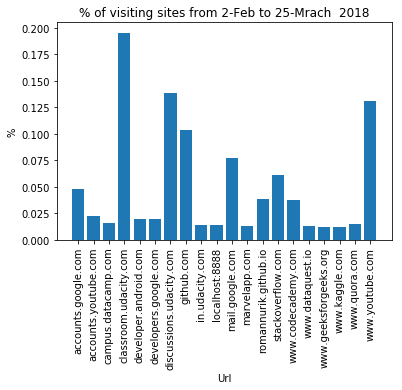

In [29]:
plt.bar(rep_data['url_domain'],rep_data['visit_count']/rep_data['visit_count'].sum())
plt.xticks(rotation='vertical')
plt.xlabel('Url')
plt.ylabel('%')
plt.title('% of visiting sites from 2-Feb to 25-Mrach  2018')


In [30]:
week_data=df[df['date_time']>'2018-03-16 00:00:00']

In [31]:
week_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2656 entries, 1 to 11742
Data columns (total 6 columns):
title          1762 non-null object
visit_count    2656 non-null int64
typed_count    2656 non-null int64
hidden         2656 non-null int64
date_time      2656 non-null object
url_domain     2655 non-null object
dtypes: int64(3), object(3)
memory usage: 114.1+ KB


In [32]:
week_data.reset_index(inplace=True)


In [33]:
week_data.drop(['index'],axis=1,inplace=True)
week_data.columns


c:\users\amit\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Index(['title', 'visit_count', 'typed_count', 'hidden', 'date_time',
       'url_domain'],
      dtype='object')

In [34]:
week_data.head()

,title,visit_count,typed_count,hidden,date_time,url_domain
0,Resume Manager | T&P DTU,93,0,0,2018-03-25 04:17:18,tnp.dtu.ac.in
1,java - How to request Location Permission at r...,11,4,0,2018-03-22 09:02:10,stackoverflow.com
2,IT eBooks Download Free | eBooks-IT.org,2,0,0,2018-03-20 06:31:38,ebooks-it.org
3,Search Engine | eBooks-IT.org,3,0,0,2018-03-20 06:31:41,ebooks-it.org
4,Free Online Courses and Nanodegree Programs | ...,69,45,0,2018-03-25 13:28:33,www.udacity.com


In [35]:
week_data.count()

title          1762
visit_count    2656
typed_count    2656
hidden         2656
date_time      2656
url_domain     2655
dtype: int64

In [36]:
week_data=week_data.groupby(['url_domain']).count()

In [37]:
week_data.tail(5)

,title,visit_count,typed_count,hidden,date_time
url_domain,,,,,
www.yuvamind.com,1,1,1,1,1
www.zvon.org,15,15,15,15,15
www2.stat.duke.edu,0,1,1,1,1
yuji.wordpress.com,1,1,1,1,1
zvon.org,2,2,2,2,2


In [38]:
week_data=week_data.sort_values(['visit_count'],ascending=False)

In [39]:
week_data.head()

,title,visit_count,typed_count,hidden,date_time
url_domain,,,,,
classroom.udacity.com,52,566,566,566,566
www.google.co.in,470,534,534,534,534
discussions.udacity.com,78,180,180,180,180
github.com,112,124,124,124,124
stackoverflow.com,92,94,94,94,94


In [40]:
week_data=week_data.reset_index()

In [41]:
week_data.head(20)

,url_domain,title,visit_count,typed_count,hidden,date_time
0,classroom.udacity.com,52,566,566,566,566
1,www.google.co.in,470,534,534,534,534
2,discussions.udacity.com,78,180,180,180,180
3,github.com,112,124,124,124,124
4,stackoverflow.com,92,94,94,94,94
5,www.youtube.com,48,51,51,51,51
6,www.imdb.com,15,43,43,43,43
7,docs.google.com,21,38,38,38,38
8,localhost:8888,18,32,32,32,32
9,accounts.google.com,17,31,31,31,31


In [42]:
rep_week=week_data.iloc[:21,[0,2]]

In [43]:
rep_week


,url_domain,visit_count
0,classroom.udacity.com,566
1,www.google.co.in,534
2,discussions.udacity.com,180
3,github.com,124
4,stackoverflow.com,94
5,www.youtube.com,51
6,www.imdb.com,43
7,docs.google.com,38
8,localhost:8888,32
9,accounts.google.com,31


In [44]:
rep_week.drop(index=1,axis=0,inplace=True)

In [45]:
rep_week


,url_domain,visit_count
0,classroom.udacity.com,566
2,discussions.udacity.com,180
3,github.com,124
4,stackoverflow.com,94
5,www.youtube.com,51
6,www.imdb.com,43
7,docs.google.com,38
8,localhost:8888,32
9,accounts.google.com,31
10,leetcode.com,31


Text(0.5,1,'% of visiting sites over last week 16-25 march 2018')

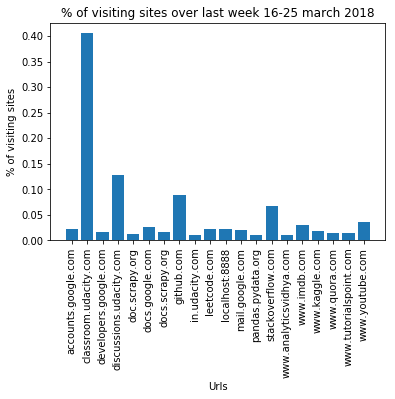

In [46]:
plt.bar(rep_week['url_domain'],rep_week['visit_count']/rep_week['visit_count'].sum())
plt.xticks(rotation='vertical')
plt.xlabel('Urls')
plt.ylabel('% of visiting sites')
plt.title('% of visiting sites over last week 16-25 march 2018')